# Problem Statement:
One of the hospitals has a patient dataset that contains a wide range of heart-related features. This data allows hospital staff to conduct detailed analyses of heart-related conditions and treatments. We must build a logistic regression model to predict whether a patient has heart disease or not. Calculate the feature importance as well. The dataset contains data for around 303 patients.
 
# Data Description:
age: Age of the patient in years.

gender: Gender of the patient.

cp: Chest pain type.

trestbps: Resting blood pressure (in mm Hg on admission to the hospital).

chol: Serum cholesterol in mg/dl.

fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

restecg: Resting electrocardiographic results.

thalach: Maximum heart rate achieved.

exang: Exercise induced angina (1 = yes; 0 = no).

oldpeak: ST depression induced by exercise relative to rest.

slope: The slope of the peak exercise ST segment.

ca: Number of major vessels (0-3) colored by fluoroscopy.

thal: 3 = normal; 6 = fixed defect; 7 = reversible defect.

heart_diagnosis: Diagnosis of heart disease (angiographic disease status) (0 = No heart disease, >0 = heart disease).

# Tasks/Activities List:
Your code should contain the following activities/Analysis:

Read the heart dataset.

Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.

Transform the categorical data.

Apply the Logistic Regression model.

Print the model results.

Get the feature importance.

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import style
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 1. Read the Heart Dataset

In [13]:
data=pd.read_csv('heart_disease.csv')
data

age  gender   cp  trestbps   chol  fbs  restecg  thalach  exang  \
0    63.0     1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
1    67.0     1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
2    67.0     1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
3    37.0     1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
4    41.0     0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   
..    ...     ...  ...       ...    ...  ...      ...      ...    ...   
298  45.0     1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0   
299  68.0     1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0   
300  57.0     1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0   
301  57.0     0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0   
302  38.0     1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0   

     oldpeak  slope   ca  thal  heart_diagnosis  
0        2.3    3.0  0.0   6.0                0  
1        1.5    2.0  3.0   3.0                2  
2        2.6    2.0  2.0   7.0                1  
3        3.5    3.0  0.0   3.0                0  
4        1.4    1.0  0.0   3.0                0  
..       ...    ...  ...   ...              ...  
298      1.2    2.0  0.0   7.0                1  
299      3.4    2.0  2.0   7.0                2  
300      1.2    2.0  1.0   7.0                3  
301      0.0    2.0  1.0   3.0                1  
302      0.0    1.0  NaN   3.0                0  

[303 rows x 14 columns]

In [14]:
print('Shape of Dataset:',data.shape)

Shape of Dataset: (303, 14)


# 2. Exploratory Data Analysis (EDA)

In [17]:
data.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
heart_diagnosis    0
dtype: int64

### 4 null values in 'ca'(No. of Major vessels) and 2 null values in 'thal'(type of defect)

In [18]:
data.describe()

age      gender          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal  heart_diagnosis  
count  301.000000       303.000000  
mean     4.734219         0.937294  
std      1.939706         1.228536  
min      3.000000         0.000000  
25%      3.000000         0.000000  
50%      3.000000         0.000000  
75%      7.000000         2.000000  
max      7.000000         4.000000

### Let's fill the null values with mean

In [19]:
datan=data

In [20]:
datan['ca']=datan['ca'].fillna(datan["ca"].mean())

In [21]:
datan['thal']=datan["thal"].fillna(datan["thal"].mean())

In [22]:
datan.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64

In [23]:
datan.duplicated().any()

False

In [30]:
datan['gender'].unique()

array([1., 0.])

In [33]:
datan['restecg'].unique()

array([2., 0., 1.])

### For heart diagnosis, (0 = No heart disease, >0 = heart disease).

In [24]:
datan['heart_diagnosis'].replace([2,3,4],1,inplace=True)

In [25]:
datan['heart_diagnosis']

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: heart_diagnosis, Length: 303, dtype: int64

## further EDA was done by using ProfileReport from ydata_profiling library and analyse function from sweetviz library

In [26]:
from ydata_profiling import ProfileReport
ProfileReport(datan)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |                                             | [  0%]   00:00 ->…


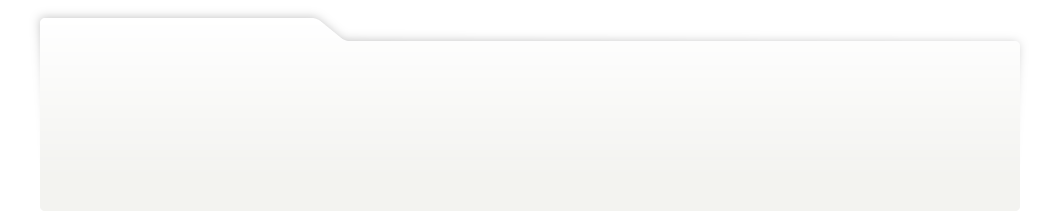
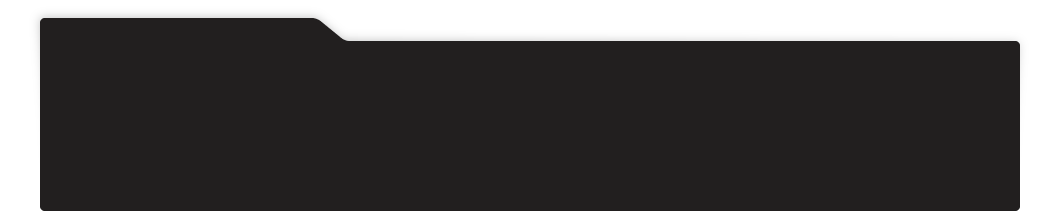
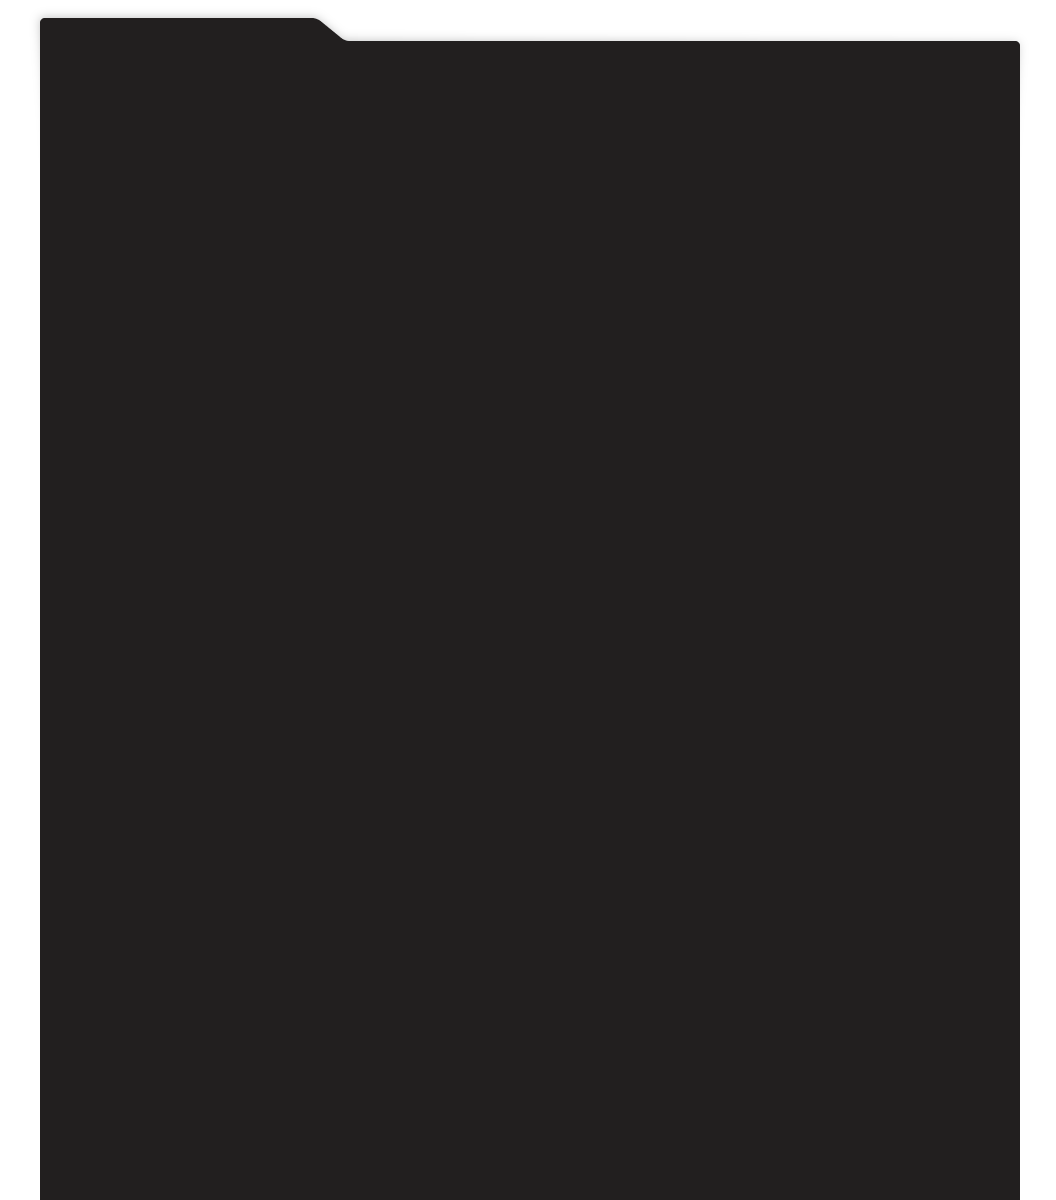
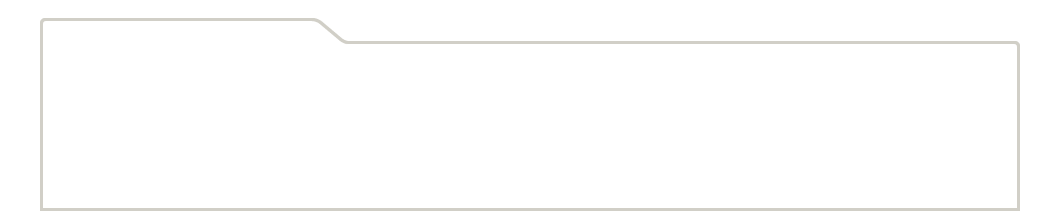
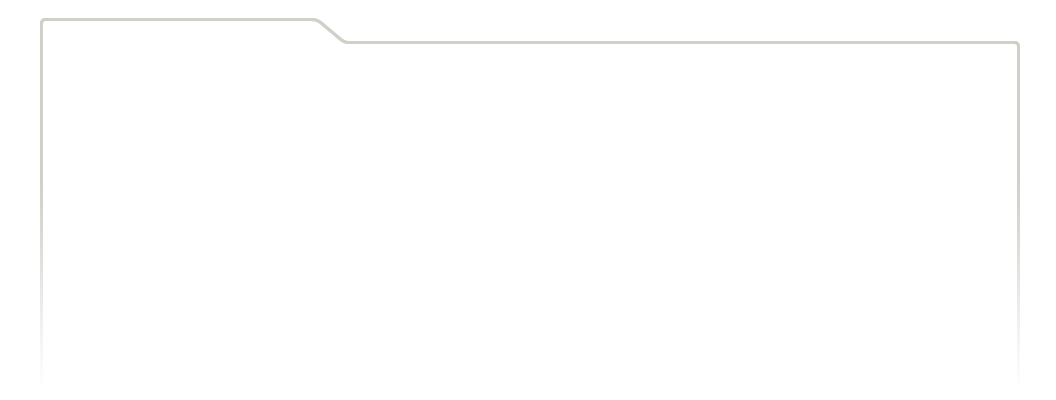
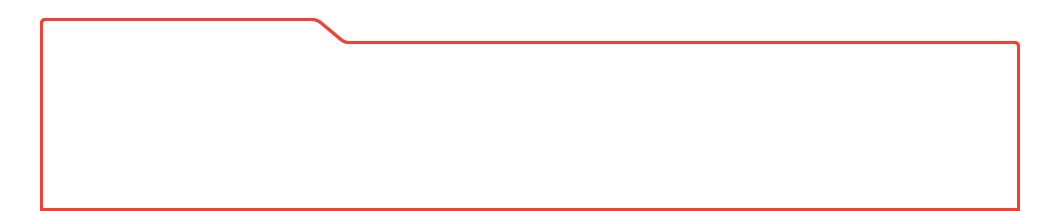
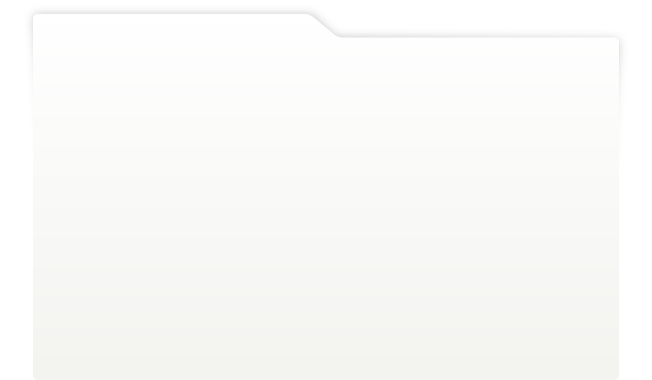
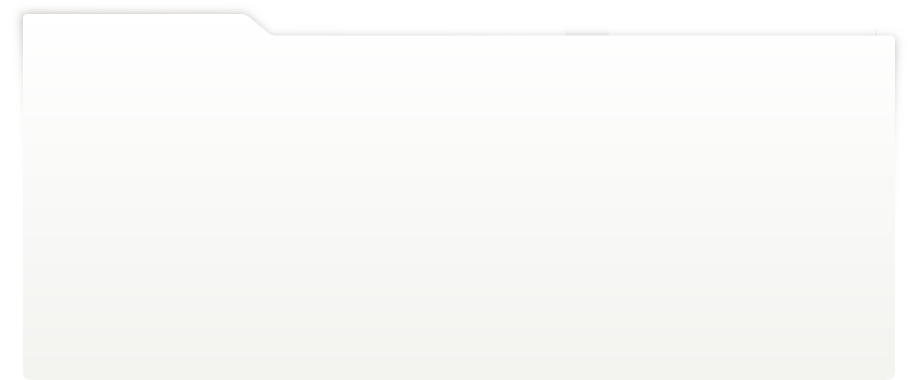
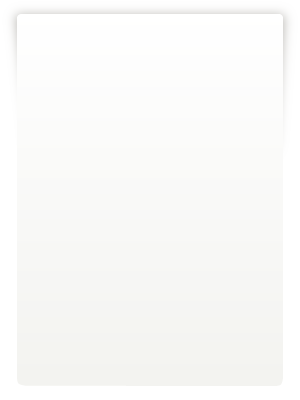
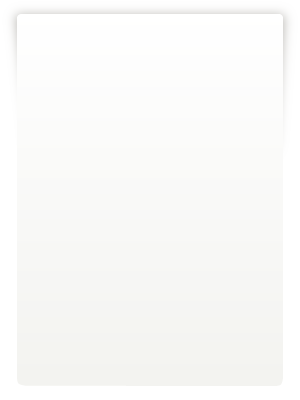
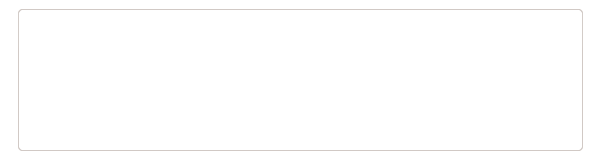
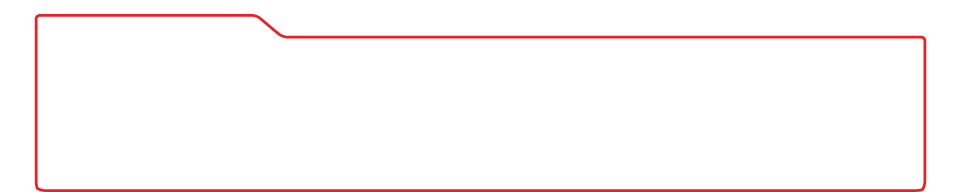
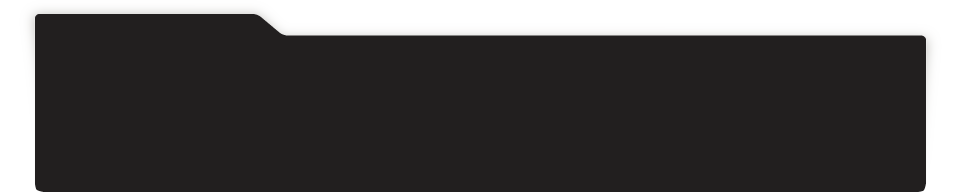
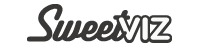
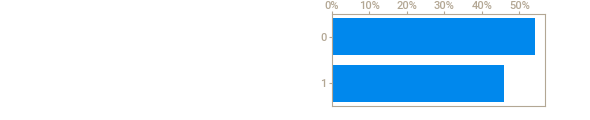
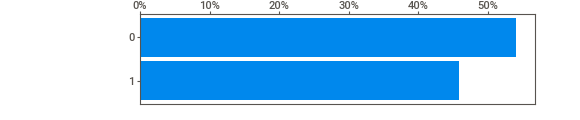
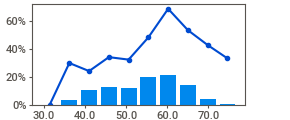
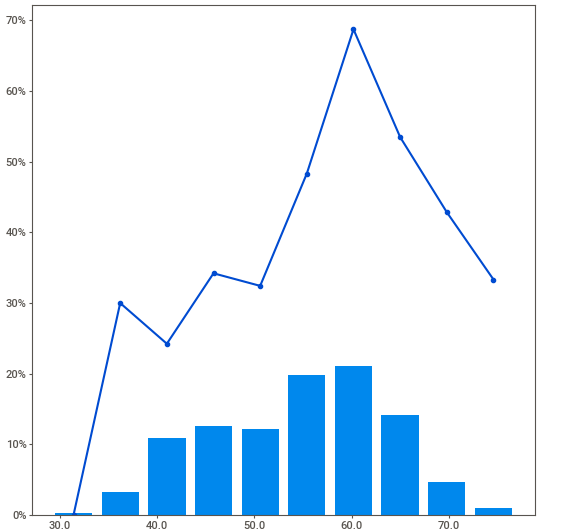
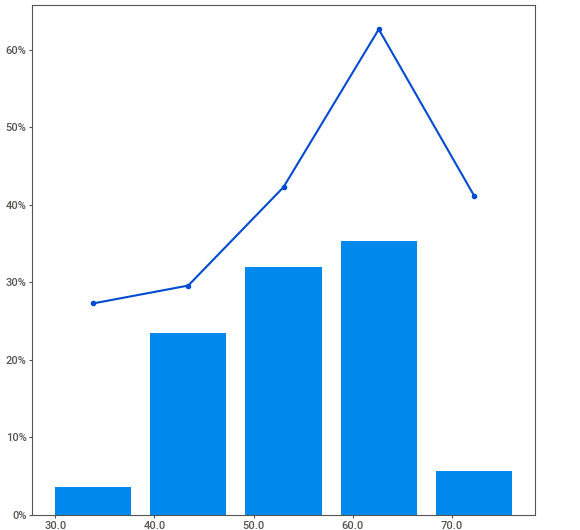
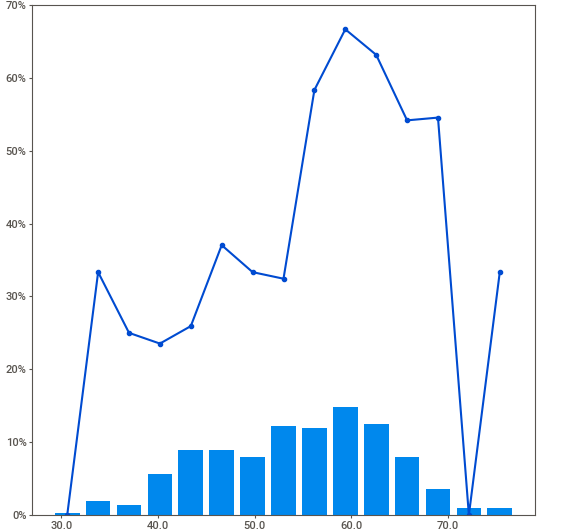
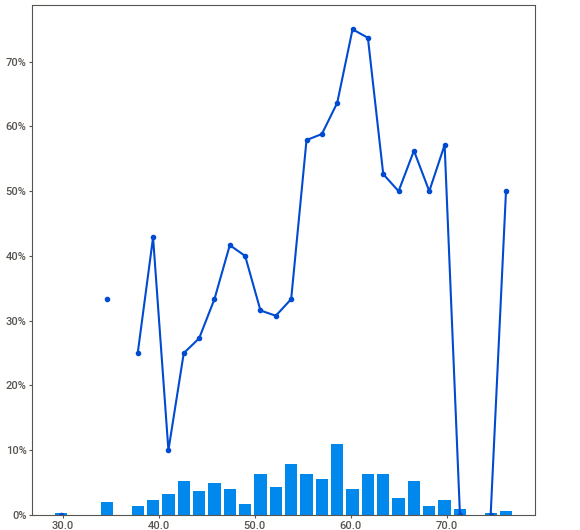
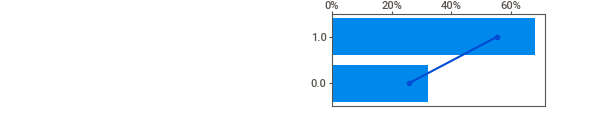
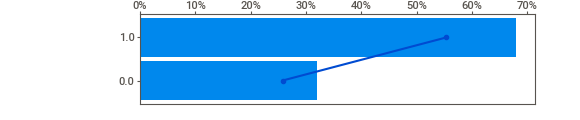
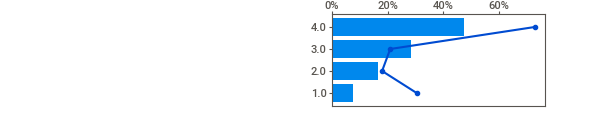
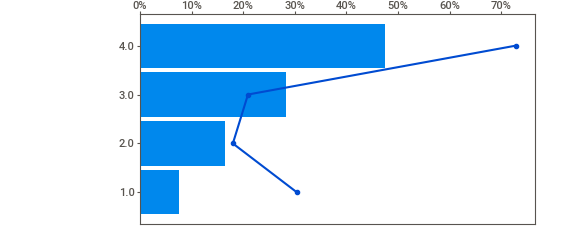
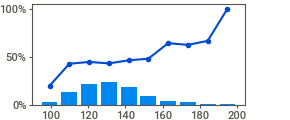
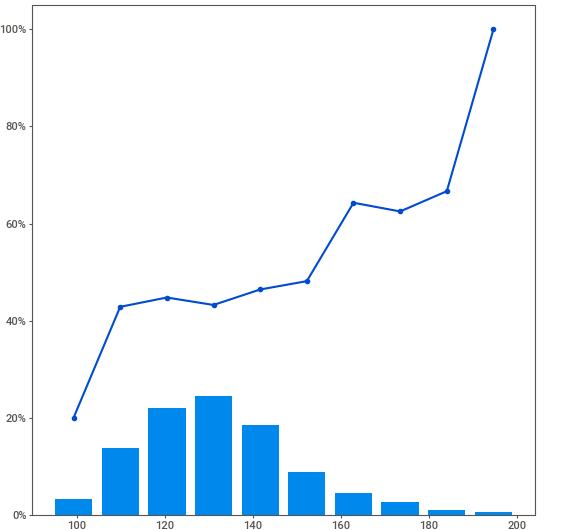
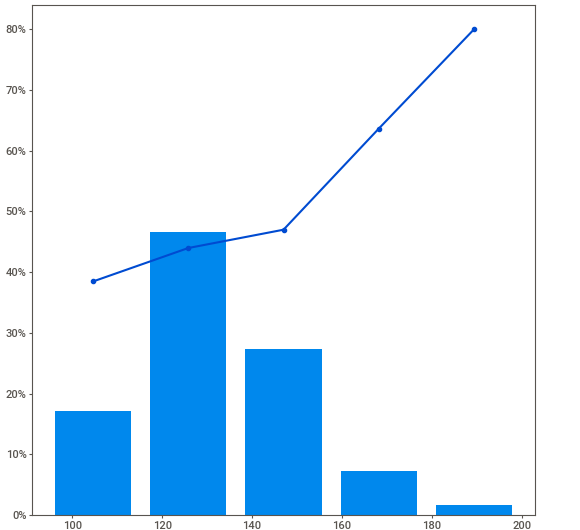
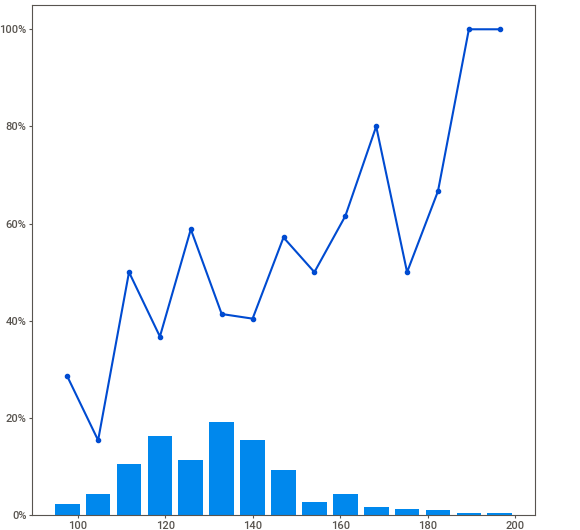
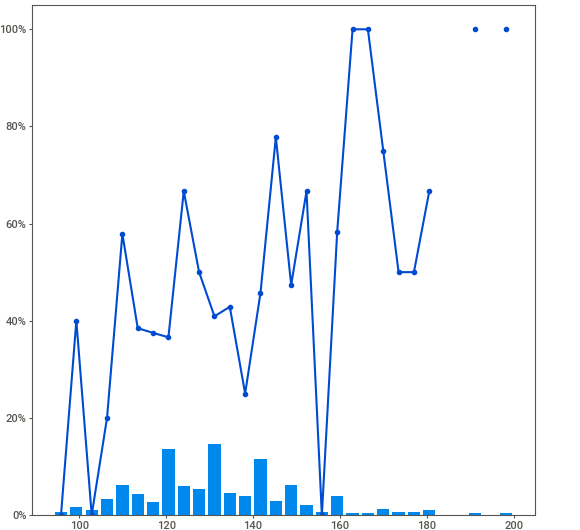
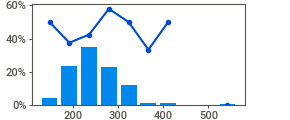
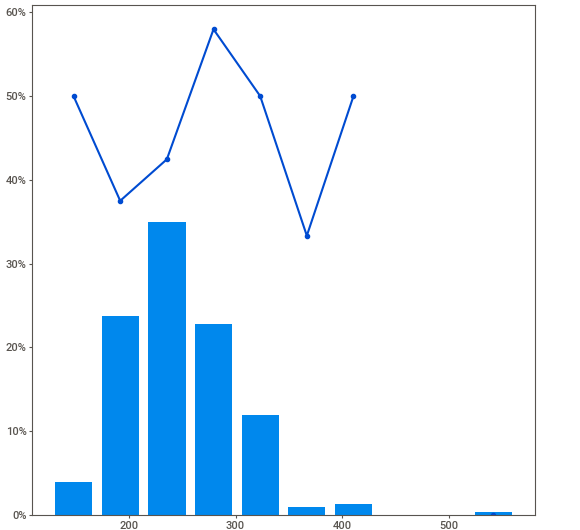
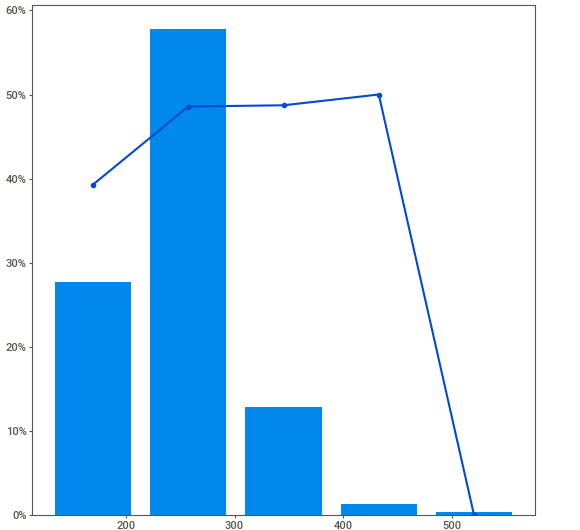
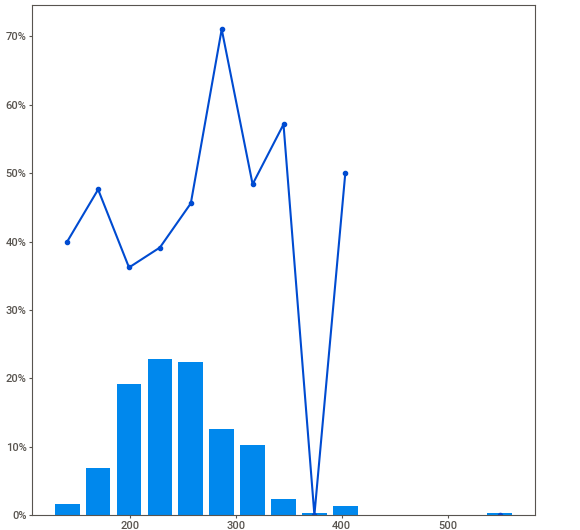
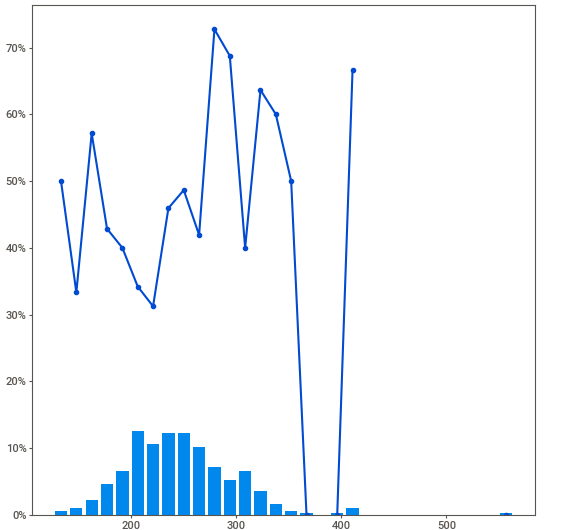
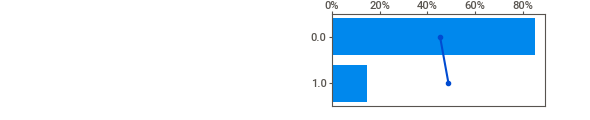
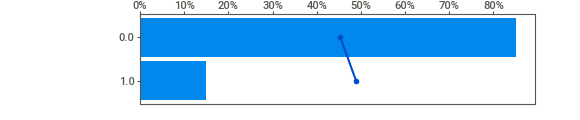
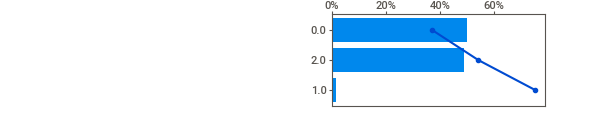
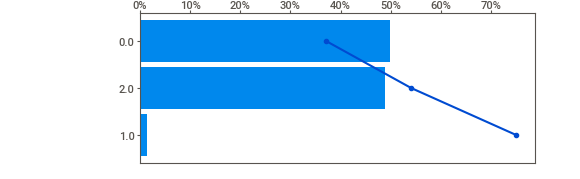
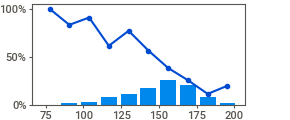
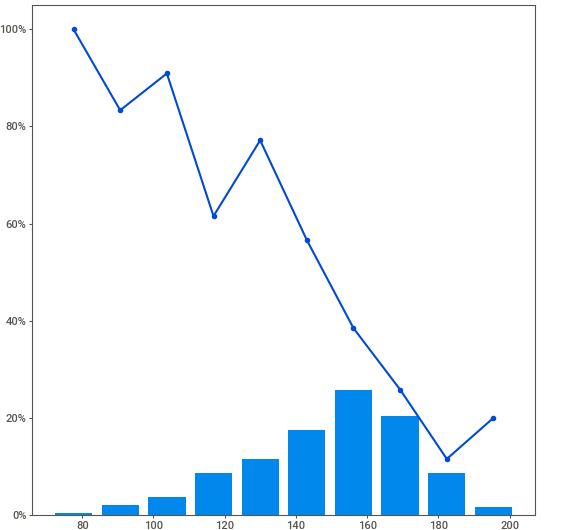
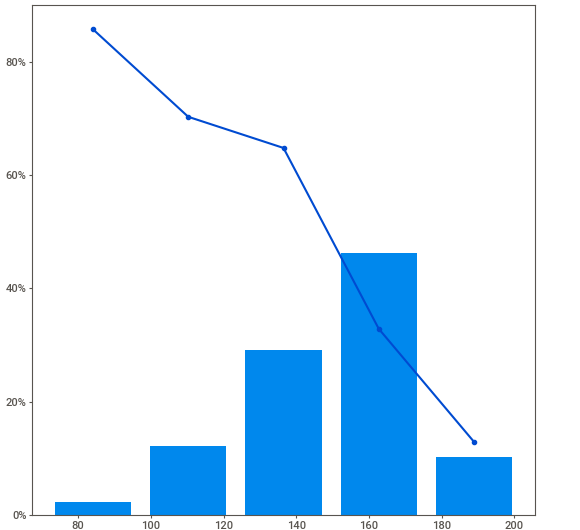
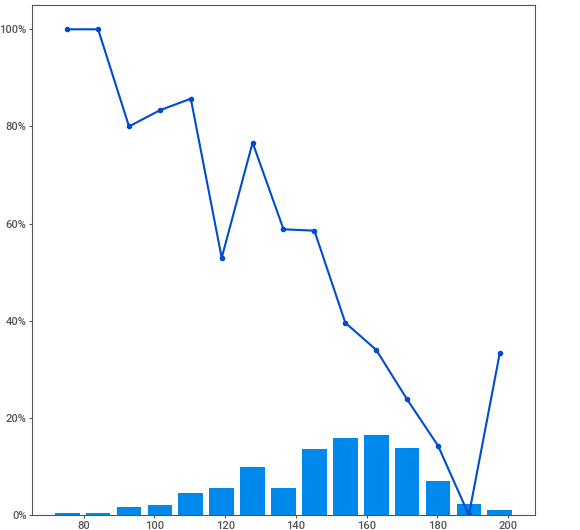
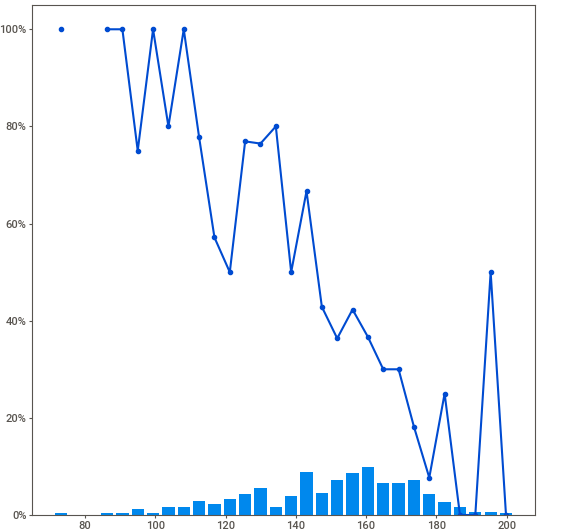
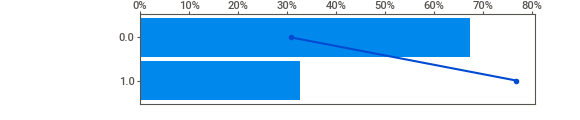
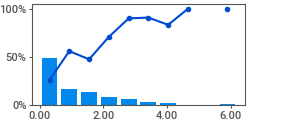
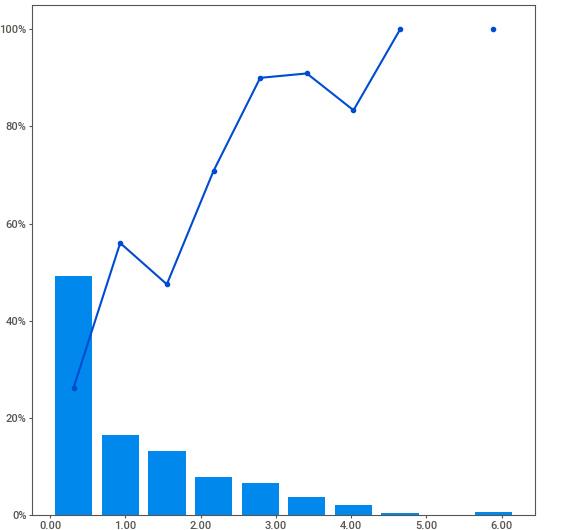
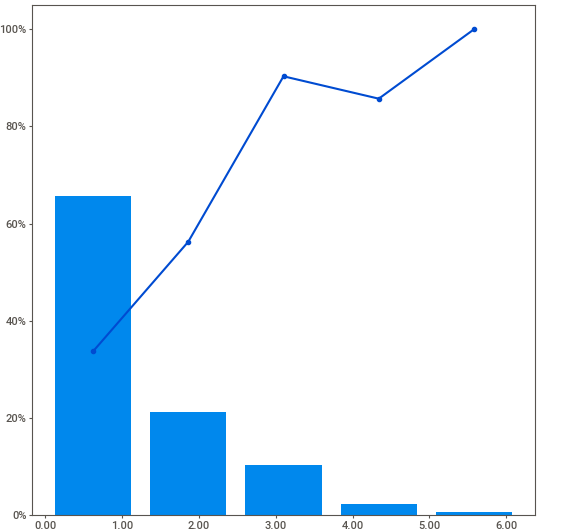
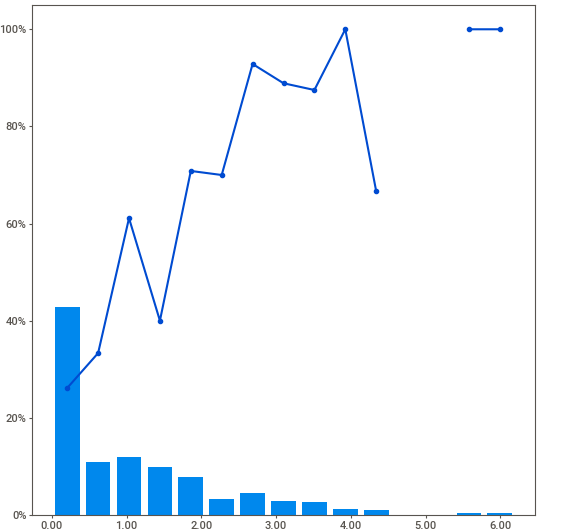
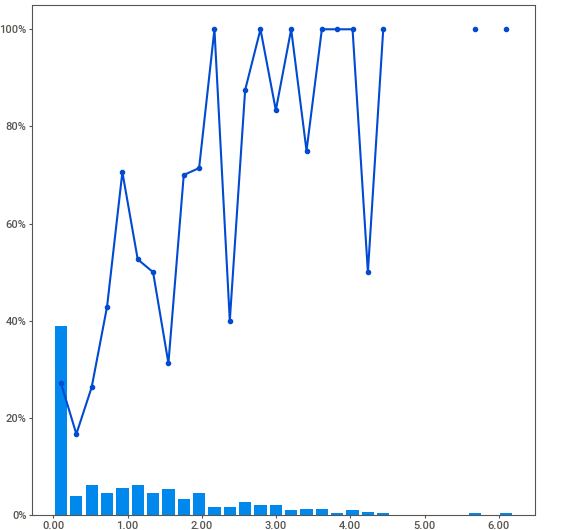
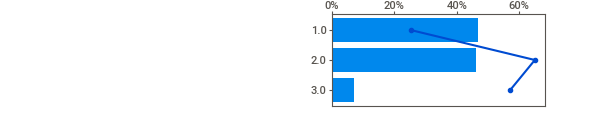
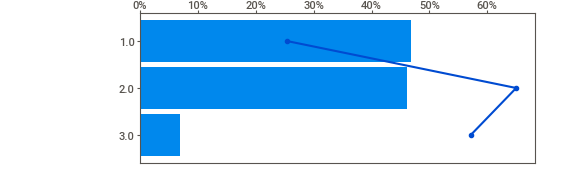
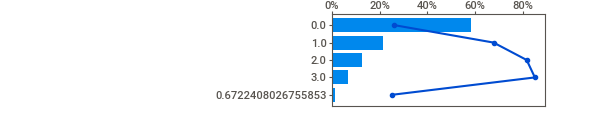
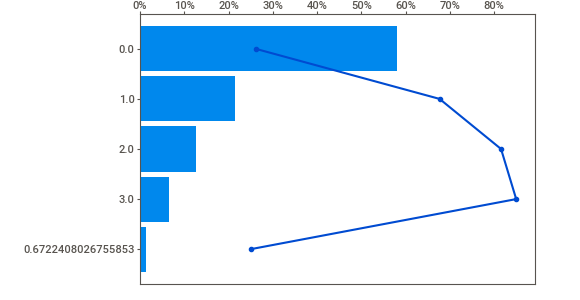
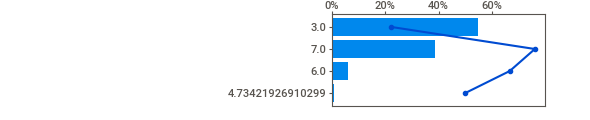
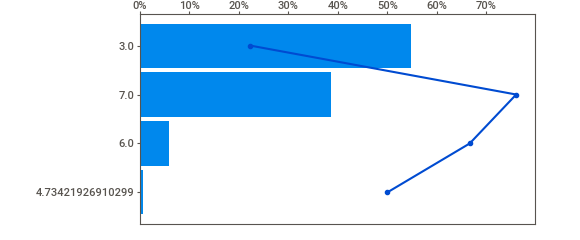
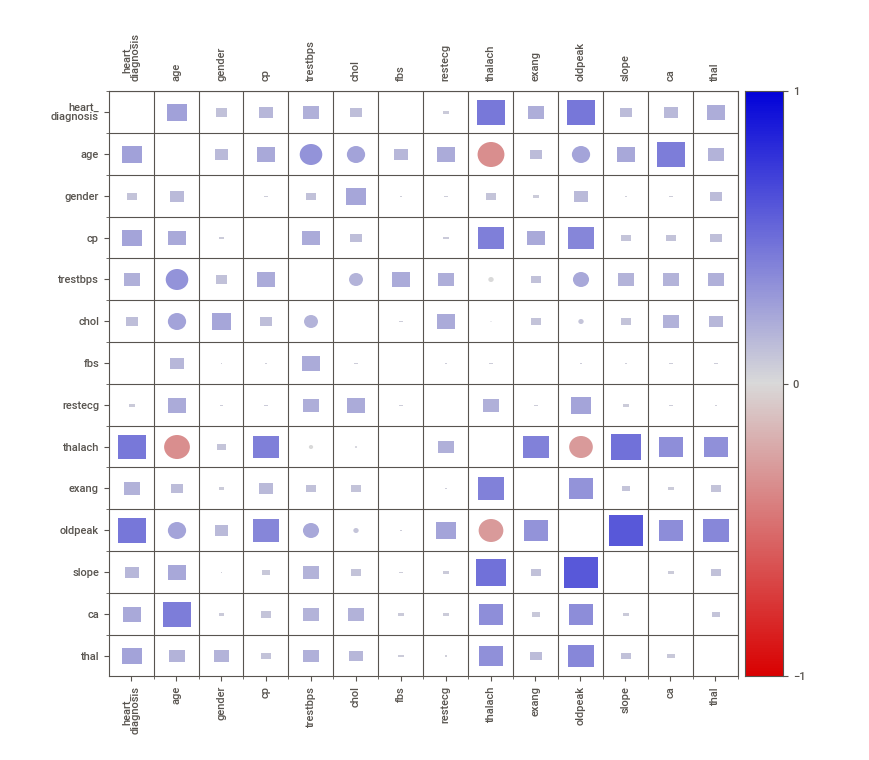
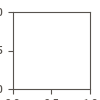

In [32]:
report=sv.analyze(datan,target_feat='heart_diagnosis')
report.show_notebook()

From the above analysis,we can assume that:

Patients around 50-60 years old has a high chance for heart disease

Men are high prone to heart disease

Frequency of heart disease is more-

1.For chest pain type 4

2.For patients who has  fasting blood sugar > 120 mg/dl

3.Patients who got Resting electrocardiographic results as 1

4.If Exercise induced angina positiveand

5.If Number of major vessels are 2 or 3


# 3.Transform the categorical data.

In [35]:
# Transform the categorical data.
# Separating the numerical and categorical columns
def data_type(datan):
    numerical = []
    categorical = []
    for i in datan.columns:
        if datan[i].dtype == 'int64' or datan[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

numerical, categorical = data_type(datan)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(datan)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(data, categorical):
    for i in categorical:
        datan[i] = datan[i].astype('category')
        datan[i] = datan[i].cat.codes
    return datan

datan = encoding(datan, categorical)

In [36]:
datan.head()

age  gender   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0     1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0     1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0     1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0     1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0     0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  heart_diagnosis  
0    3.0  0.0   6.0                0  
1    2.0  3.0   3.0                1  
2    2.0  2.0   7.0                1  
3    3.0  0.0   3.0                0  
4    1.0  0.0   3.0                0

# 4. Apply the Logistic Regression model

In [37]:
X = datan.drop(['heart_diagnosis'], axis=1)
y = datan['heart_diagnosis']

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (303, 13)
Shape of y is:  (303,)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [95]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("y_test shape: ", y_test.shape)

X_test shape: (91, 13)
X_train shape: (212, 13)
y_train shape: (212,)
y_test shape:  (91,)


In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [98]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)


# 5. Print the model results

In [99]:
print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_test, y_test)}")

model score on training data: 0.8443396226415094
model score on testing data: 0.8351648351648352


# 6. Get the Feature Importance

In [100]:
feature_importance = pd.DataFrame(data=model.coef_.ravel(), index=X.columns,columns=['coefficients'])
feature_importance.sort_values(by='coefficients',ascending=False)

coefficients
ca            1.368954
gender        0.745459
exang         0.541480
thal          0.538171
cp            0.419587
slope         0.384201
chol          0.363053
trestbps      0.270999
restecg       0.104113
oldpeak       0.092110
age           0.010890
fbs          -0.101249
thalach      -0.369443

### The column 'ca' has high importance in the dataset